In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Titanic.csv', encoding='latin-1', sep=',')
# Como el archivo original está en inglés, queremos traducirlo al español
#Primero cambiamos los encabezados de las columnas
df = df.rename(columns={'PassengerId': 'ID_pasajero', 'Survived':'Supervivencia', 'Pclass':'Clase', 'Name':'Nombre', 'Sex':'Sexo', 'Age':'Edad', 'SibSp':'HerEsp', 'Parch':'PadHij', 'Fare':'Tarifa', 'Cabin':'Cabina','Embarked':'Embarque'})
# Luego reemplazamos 'female' por 'femenino' y 'male' por 'masculino' en la columna 'Sexo'
df['Sexo'] = df['Sexo'].replace({'female': 'femenino', 'male': 'masculino'})
# Finalmente, para trabajar sobre un nuevo archivo traducido, sin tocar el original,
# guardamos el DataFrame modificado en un nuevo archivo CSV
df.to_csv('titanic_traducido.csv', index=False)

In [3]:
df = pd.read_csv('titanic_traducido.csv', encoding='latin-1', sep=',')
df

,ID_pasajero,Supervivencia,Clase,Nombre,Sexo,Edad,HerEsp,PadHij,Ticket,Tarifa,Cabina,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femenino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femenino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femenino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",masculino,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",femenino,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",femenino,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",masculino,26.0,0,0,111369,30.0000,C148,C


In [4]:

for index, row in df.iterrows():
        id_pasajero = row['ID_pasajero']
        supervivencia = row['Supervivencia']
        clase = row['Clase']
        nombre = row['Nombre']
        sexo = row['Sexo']
        edad = row['Edad']
        hermanos_esposos = row['HerEsp']
        padres_hijos = row['PadHij']
        ticket = row['Ticket']
        tarifa = row['Tarifa']
        cabina = row['Cabina']
        embarque = row['Embarque']


# Puedes agregar relaciones (bordes) entre pasajeros aquí si es necesario

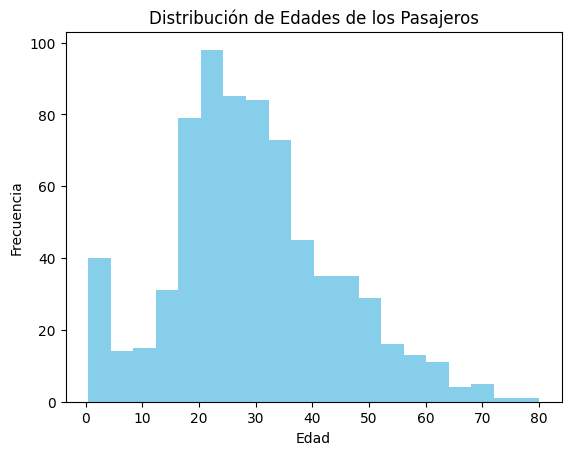

In [5]:
# Supongamos que 'df' es tu DataFrame
plt.hist(df['Edad'].dropna(), bins=20, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Pasajeros')
plt.show()


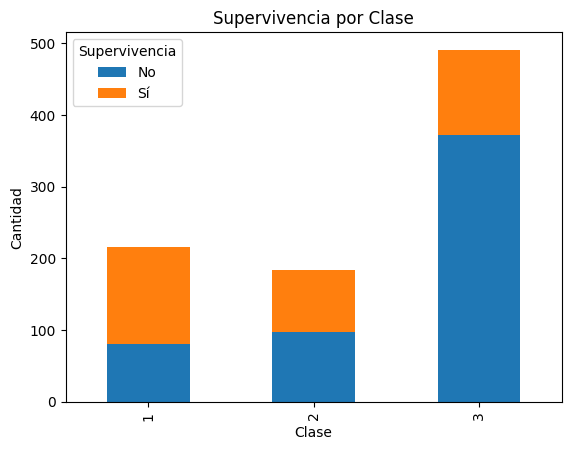

In [6]:
# Supongamos que 'df' es tu DataFrame
survival_by_class = df.groupby('Clase')['Supervivencia'].value_counts().unstack()
survival_by_class.plot(kind='bar', stacked=True)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Supervivencia por Clase')
plt.legend(title='Supervivencia', labels=['No', 'Sí'])
plt.show()

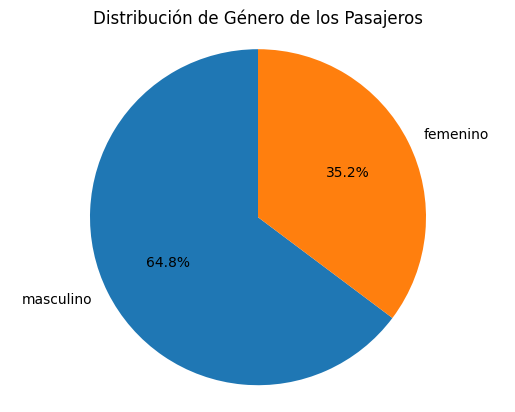

In [7]:
# Supongamos que 'df' es tu DataFrame
gender_counts = df['Sexo'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Género de los Pasajeros')
plt.show()

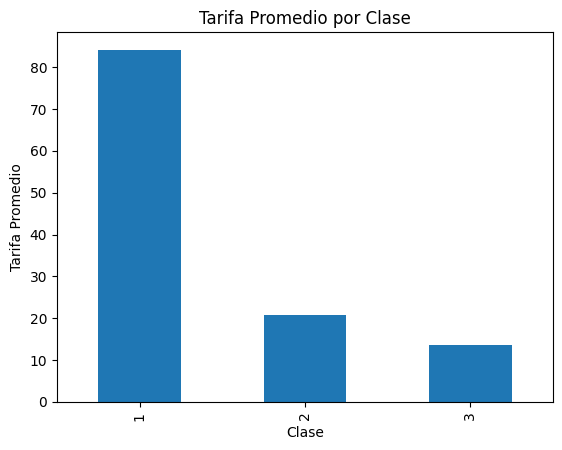

In [8]:
# Supongamos que 'df' es tu DataFrame
fare_by_class = df.groupby('Clase')['Tarifa'].mean()
fare_by_class.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Tarifa Promedio')
plt.title('Tarifa Promedio por Clase')
plt.show()

C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2547688776.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 1][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2547688776.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 1][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2547688776.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 1][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2547688776.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 1][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\254

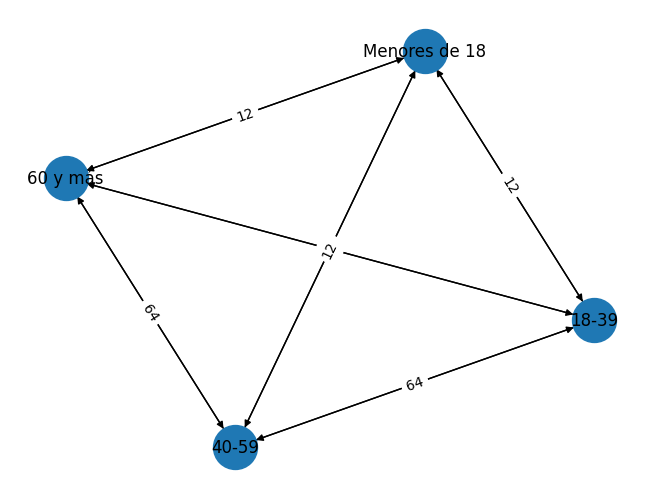

In [9]:
# Crear un grafo dirigido
G = nx.DiGraph()
# Definir rangos de edades
def rango_edad(edad):
    if edad < 18:
        return 'Menores de 18'
    elif 18 <= edad < 40:
        return '18-39'
    elif 40 <= edad < 60:
        return '40-59'
    else:
        return '60 y más'

# Agrupar a los pasajeros por rango de edades y crear nodos en el grafo
for edad_en_rango in df['Edad'].apply(rango_edad).unique():
    G.add_node(edad_en_rango, RangoEdad=edad_en_rango)

# Establecer relaciones entre los nodos basadas en la clase de pasajeros
for rango_edad1 in G.nodes():
    for rango_edad2 in G.nodes():
        if rango_edad1 != rango_edad2:
            contador_clase = df[df['Clase'] == 1][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
            G.add_edge(rango_edad1, rango_edad2, ContadorClase=contador_clase)

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12)
labels = nx.get_edge_attributes(G, 'ContadorClase')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2509954002.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 2][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2509954002.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 2][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2509954002.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 2][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\2509954002.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 2][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\250

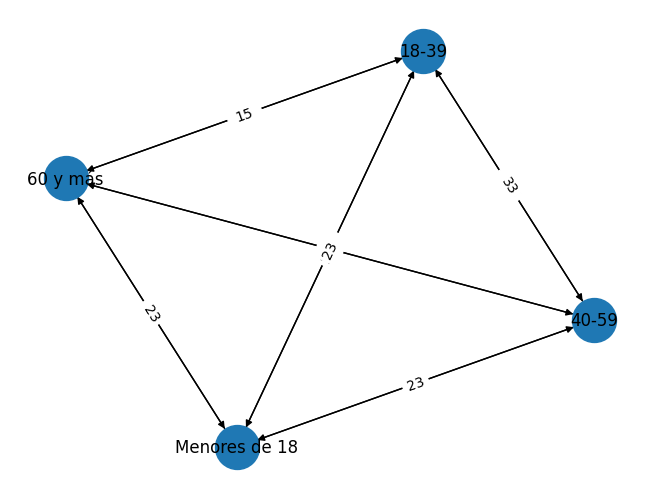

In [10]:
# Crear un grafo dirigido
G = nx.DiGraph()
# Definir rangos de edades
def rango_edad(edad):
    if edad < 18:
        return 'Menores de 18'
    elif 18 <= edad < 40:
        return '18-39'
    elif 40 <= edad < 60:
        return '40-59'
    else:
        return '60 y más'

# Agrupar a los pasajeros por rango de edades y crear nodos en el grafo
for edad_en_rango in df['Edad'].apply(rango_edad).unique():
    G.add_node(edad_en_rango, RangoEdad=edad_en_rango)

# Establecer relaciones entre los nodos basadas en la clase de pasajeros
for rango_edad1 in G.nodes():
    for rango_edad2 in G.nodes():
        if rango_edad1 != rango_edad2:
            contador_clase = df[df['Clase'] == 2][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
            G.add_edge(rango_edad1, rango_edad2, ContadorClase=contador_clase)

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12)
labels = nx.get_edge_attributes(G, 'ContadorClase')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\3645365887.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 3][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\3645365887.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 3][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\3645365887.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 3][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\3645365887.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contador_clase = df[df['Clase'] == 3][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
C:\Users\bkill\AppData\Local\Temp\ipykernel_8784\364

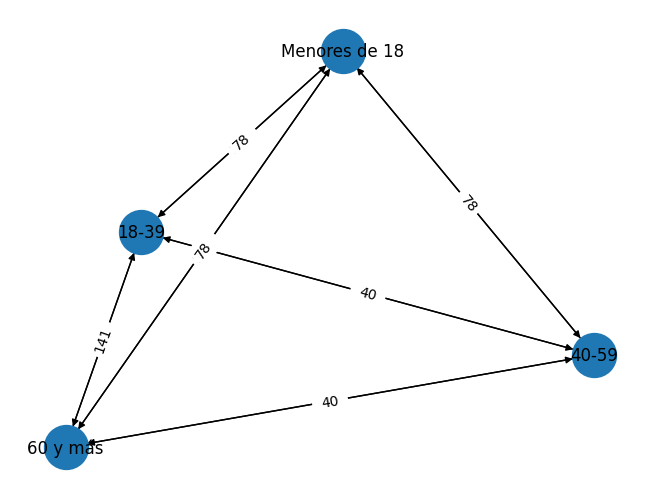

In [11]:
# Crear un grafo dirigido
G = nx.DiGraph()
# Definir rangos de edades
def rango_edad(edad):
    if edad < 18:
        return 'Menores de 18'
    elif 18 <= edad < 40:
        return '18-39'
    elif 40 <= edad < 60:
        return '40-59'
    else:
        return '60 y más'

# Agrupar a los pasajeros por rango de edades y crear nodos en el grafo
for edad_en_rango in df['Edad'].apply(rango_edad).unique():
    G.add_node(edad_en_rango, RangoEdad=edad_en_rango)

# Establecer relaciones entre los nodos basadas en la clase de pasajeros
for rango_edad1 in G.nodes():
    for rango_edad2 in G.nodes():
        if rango_edad1 != rango_edad2:
            contador_clase = df[df['Clase'] == 3][df['Edad'].apply(rango_edad) == rango_edad1].shape[0]
            G.add_edge(rango_edad1, rango_edad2, ContadorClase=contador_clase)

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12)
labels = nx.get_edge_attributes(G, 'ContadorClase')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [12]:
# Aplicar la función age_range para crear una nueva columna 'AgeRange'
df['RangoEdad'] = df['Edad'].apply(rango_edad)

# Contar la cantidad de pasajeros en cada rango de edad
contador_por_rango = df['RangoEdad'].value_counts()

# Mostrar el resultado
print(contador_por_rango)

RangoEdad
18-39            438
60 y más         203
40-59            137
Menores de 18    113
Name: count, dtype: int64


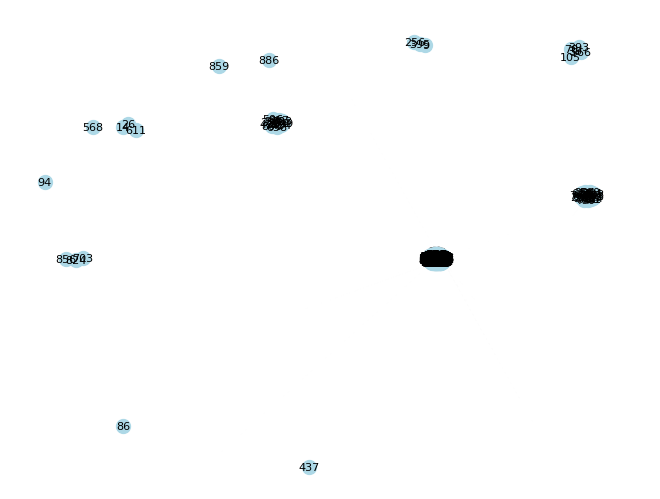

In [13]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Filtrar pasajeros de la Clase 3
pasajeros_clase_3 = df[(df['Clase'] == 3) & (df['Edad'].between(18, 39))]

# Agregar nodos al grafo para representar a los pasajeros de la Clase 3
for _, pasajero in pasajeros_clase_3.iterrows():
    G.add_node(pasajero['ID_pasajero'], HerEsp=pasajero['HerEsp'], PadHij=pasajero['PadHij'])

# Establecer relaciones entre pasajeros con la misma cantidad de HerEsp y PadHij
for passenger1 in pasajeros_clase_3.itertuples(index=False):
    for passenger2 in pasajeros_clase_3.itertuples(index=False):
        if (passenger1.ID_pasajero != passenger2.ID_pasajero and
            passenger1.HerEsp == passenger2.HerEsp and
            passenger1.PadHij == passenger2.PadHij):
            G.add_edge(passenger1.ID_pasajero, passenger2.ID_pasajero)

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color='lightblue', edge_color='gray')
plt.show()

# Establecer relaciones entre pasajeros de la Clase 3 con la misma cantidad de Heresp y Parhij
#for pasajero1 in pasajeros_clase_3.itertuples(index=False):
#    for pasajero2 in pasajeros_clase_3.itertuples(index=False):
#        if (pasajero1.ID_pasajero != pasajero2.ID_pasajero and pasajero1.HerEsp == pasajero2.HerEsp and pasajero1.PadHij == pasajero2.PadHij):
#            G.add_edge(pasajero1.ID_pasajero, pasajero2.ID_pasajero)

# Dibujar el grafo
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color='lightblue', edge_color='gray')
#plt.show()

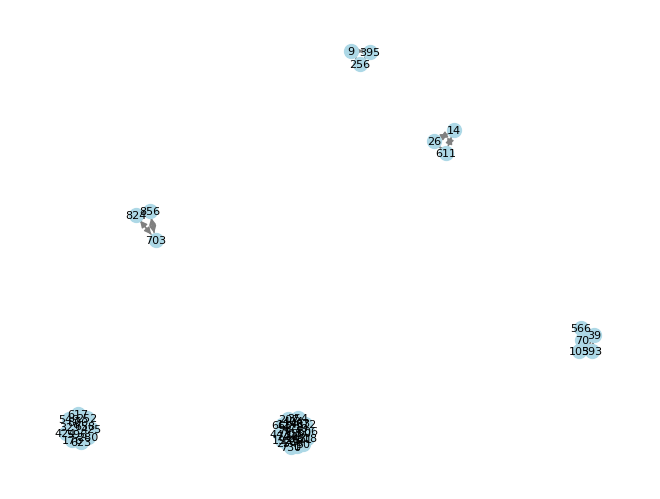

In [18]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Filtrar pasajeros que son hijos o padres
padres_e_hijos = df[(df['HerEsp'] > 0) | (df['PadHij'] > 0)]
padres_e_hijos = padres_e_hijos[(padres_e_hijos['Clase'] == 3) & (padres_e_hijos['Edad'].between(18, 39))]

# Filtrar los pasajeros que no tienen ningún familiar
sin_familia = df[(df['HerEsp'] == 0) & (df['PadHij'] == 0)]

# Agregar nodos al grafo para representar a los pasajeros seleccionados
for _, passenger in padres_e_hijos.iterrows():
    G.add_node(pasajero['ID_pasajero'], HerEsp=pasajero['HerEsp'], PadHij=pasajero['PadHij'])

# Establecer relaciones entre pasajeros con la misma cantidad de HijEsp y PadHij
for passenger1 in padres_e_hijos.itertuples(index=False):
    for passenger2 in padres_e_hijos.itertuples(index=False):
        if (passenger1.ID_pasajero != passenger2.ID_pasajero and
            passenger1.HerEsp == passenger2.HerEsp and
            passenger1.PadHij == passenger2.PadHij):
            G.add_edge(passenger1.ID_pasajero, passenger2.ID_pasajero)

# Eliminar nodos sin familia del grafo
for _, passenger in sin_familia.iterrows():
    if G.has_node(passenger['ID_pasajero']):
        G.remove_node(passenger['ID_pasajero'])

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color='lightblue', edge_color='gray')
plt.show()


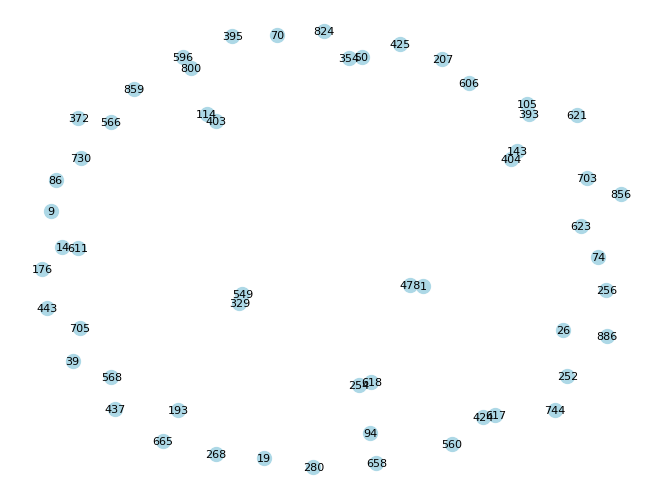

In [23]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Filtrar pasajeros que son padres o hijos y que cumplen con la condición de clase y edad
padres_e_hijos = df[(df['HerEsp'] > 0) | (df['PadHij'] > 0)]
padres_e_hijos = padres_e_hijos[(padres_e_hijos['Clase'] == 3) & (padres_e_hijos['Edad'].between(18, 39))]

# Filtrar los pasajeros que no tienen ningún familiar
sin_familia = df[(df['HerEsp'] == 0) & (df['PadHij'] == 0)]

# Agregar nodos al grafo para representar a los pasajeros seleccionados y extraer el apellido
for _, pasajero in padres_e_hijos.iterrows():
    apellido, nombre = pasajero['Nombre'].split(',', 1)
    G.add_node(pasajero['ID_pasajero'], HerEsp=pasajero['HerEsp'], PadHij=pasajero['PadHij'], Apellido=apellido.strip())

# Establecer relaciones entre pasajeros con la misma cantidad de HerEsp, PadHij y el mismo apellido
for pasajero1 in padres_e_hijos.itertuples(index=False):
    for pasajero2 in padres_e_hijos.itertuples(index=False):
        if (pasajero1.ID_pasajero != pasajero2.ID_pasajero and
            pasajero1.HerEsp == pasajero2.HerEsp and
            pasajero1.PadHij == pasajero2.PadHij and
            #pasajero1.Apellido == pasajero2.Apellido):
            G.nodes[pasajero1.ID_pasajero]['Apellido'] == G.nodes[pasajero2.ID_pasajero]['Apellido']):
            G.add_edge(pasajero1.ID_pasajero, pasajero2.ID_pasajero)

# Eliminar nodos sin familia del grafo
for _, pasajero in sin_familia.iterrows():
    if G.has_node(pasajero['ID_pasajero']):
        G.remove_node(pasajero['ID_pasajero'])

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color='lightblue', edge_color='gray')
plt.show()